In [1]:
train_dir = "/content/drive/MyDrive/dogs vs cats/train"
test_dir = "/content/drive/MyDrive/dogs vs cats/test"

2. Set Up ImageDataGenerator
Use TensorFlow’s ImageDataGenerator to load and preprocess the images:

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data_aug = ImageDataGenerator( rescale=1/255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_data_aug = ImageDataGenerator( rescale=1/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [5]:
train_data_gen = train_data_aug.flow_from_directory(train_dir,target_size=(128,128),batch_size=32,class_mode='binary',subset='training')

Found 455 images belonging to 2 classes.


In [6]:
train_data_gen

In [7]:
validation_data_gen = train_data_aug.flow_from_directory(train_dir,target_size=(128,128),batch_size=32,class_mode='binary',subset='validation')

Found 112 images belonging to 2 classes.


In [8]:
test_data_gen = test_data_aug.flow_from_directory(test_dir,target_size=(128,128),batch_size=32,class_mode='binary')

Found 140 images belonging to 2 classes.


## model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input

In [10]:
model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
hist = model.fit(train_data_gen,epochs=10,validation_data=validation_data_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.4847 - loss: 0.7014 - val_accuracy: 0.5089 - val_loss: 0.7054
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.5156 - loss: 0.6900 - val_accuracy: 0.5089 - val_loss: 0.6922
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 372ms/step - accuracy: 0.5207 - loss: 0.6930 - val_accuracy: 0.5089 - val_loss: 0.6917
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.5294 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.5416 - loss: 0.6927 - val_accuracy: 0.5625 - val_loss: 0.6925
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.6340 - loss: 0.6918 - val_accuracy: 0.6250 - val_loss: 0.6910
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.5569 - loss: 0.6897 - val_accuracy: 0.6161 - val_loss: 0.6859
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.5875 - loss: 0.6818 - val_accuracy: 0.5179 - v

not at all good


In [14]:
# lets add l2 regularization
from tensorflow.keras.regularizers import l2

In [15]:
model_1 = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(200,3,activation='relu',kernel_regularizer=l2(0.01)),
    MaxPool2D(2,2),
    Conv2D(100,3,activation='relu',kernel_regularizer=l2(0.01)),
    MaxPool2D(2,2),
    Conv2D(100,3,activation='relu',kernel_regularizer=l2(0.01)),
    MaxPool2D(2,2),
    Conv2D(100,3,activation='relu',kernel_regularizer=l2(0.01)),
    MaxPool2D(2,2),
    Conv2D(50,3,activation='relu',kernel_regularizer=l2(0.01)),
    MaxPool2D(2,2),
    Flatten(),
    Dense(100,activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
train_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [18]:
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(train_data_gen.classes),y=train_data_gen.classes)

In [19]:
class_weights

array([1.015625  , 0.98484848])

### Explanation of **3. Learning Rate Adjustment**

The learning rate determines the step size at which the model updates its weights during training. If the learning rate is too high, the model might overshoot the optimal values, causing the loss to fluctuate or fail to converge. Conversely, if the learning rate is too low, the training process can be very slow or get stuck in local minima.

---

### Why Adjust the Learning Rate?
- **Plateauing Validation Loss**: If the validation loss does not improve for several epochs, it may indicate that the learning rate is too high for the optimizer to make meaningful updates.
- **Oscillating Validation Loss**: High learning rates can cause unstable training, leading to oscillations in loss.
- **Fine-Tuning**: Reducing the learning rate as training progresses allows the model to make finer adjustments and converge better.

---

### **Solution: ReduceLROnPlateau Callback**
The `ReduceLROnPlateau` callback in Keras automatically reduces the learning rate when a monitored metric (like `val_loss`) stops improving.

#### Code Example:
```python
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce learning rate by half
    patience=3,          # Wait for 3 epochs with no improvement
    verbose=1            # Print learning rate updates
)

# Add it to the model training process
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[lr_scheduler]
)
```

---

### **How It Works:**
- The callback monitors `val_loss` during training.
- If `val_loss` does not improve for `patience` epochs, the learning rate is multiplied by the `factor` (e.g., reduced by half if `factor=0.5`).
- This allows the model to make smaller, more precise updates as training progresses, especially when approaching convergence.

---

### **Example Output:**
When `val_loss` plateaus for 3 consecutive epochs:
```
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005.
```

---

### When to Use:
- Validation loss stops improving or fluctuates.
- Training starts well but hits a plateau in accuracy.
- You are training a deep network or working with a large dataset where fine-tuning is essential.

This strategy can help improve both convergence and generalization, especially when combined with early stopping.

In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

In [23]:
hist_1=model_1.fit(train_data_gen,epochs=15,validation_data=validation_data_gen,callbacks=[lr_scheduler])

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.5136 - loss: 0.6944 - val_accuracy: 0.5089 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 392ms/step - accuracy: 0.5170 - loss: 0.6938 - val_accuracy: 0.5089 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.4913 - loss: 0.6938 - val_accuracy: 0.5089 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 427ms/step - accuracy: 0.4769 - loss: 0.6943 - val_accuracy: 0.5089 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.4635 - loss: 0.6938 - val_accuracy: 0.5089 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 500ms/step - accuracy: 0.5252 - loss: 0.6928 - val_accuracy: 0.5089 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - accuracy: 0.5452 - loss: 0.6920 -

## lets try transfer learning

In [24]:
from tensorflow.keras.applications import MobileNetV2

In [25]:
base_model = MobileNetV2(input_shape=(128,128,3),include_top=False,weights='imagenet')
base_model.trainable=False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [29]:
transfer_model = Sequential([
    base_model,GlobalAveragePooling2D(),
    Flatten(),
    Dense(150,activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1,activation='sigmoid')

])

In [33]:
transfer_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
transfer_hist = transfer_model.fit(train_data_gen,epochs=20,validation_data=validation_data_gen,callbacks=[lr_scheduler])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 982ms/step - accuracy: 0.6768 - loss: 3.1853 - val_accuracy: 0.8571 - val_loss: 2.5164 - learning_rate: 0.0010
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.8856 - loss: 2.3443 - val_accuracy: 0.8929 - val_loss: 2.0407 - learning_rate: 0.0010
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 298ms/step - accuracy: 0.9211 - loss: 1.8612 - val_accuracy: 0.8571 - val_loss: 1.7253 - learning_rate: 0.0010
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 396ms/step - accuracy: 0.9392 - loss: 1.5406 - val_accuracy: 0.8750 - val_loss: 1.4848 - learning_rate: 0.0010
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - accuracy: 0.9419 - loss: 1.3055 - val_accuracy: 0.8929 - val_loss: 1.2441 - learning_rate: 0.0010
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.9420 - loss: 1.1377 - val_accuracy: 0.9018 - val_loss: 1.0925 - learning_rate: 0.0010
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 373ms/step - accuracy: 0.9571 - loss: 0.9762

In [36]:
transfer_hist.history

{'accuracy': [0.7802197933197021,
  0.903296709060669,
  0.9230769276618958,
  0.9406593441963196,
  0.9472527503967285,
  0.9428571462631226,
  0.9450549483299255,
  0.9384615421295166,
  0.9604395627975464,
  0.9450549483299255,
  0.9362637400627136,
  0.9428571462631226,
  0.9516483545303345,
  0.9758241772651672,
  0.9648351669311523,
  0.9274725317955017,
  0.9340659379959106,
  0.9582417607307434,
  0.9670329689979553,
  0.9802197813987732],
 'loss': [2.92158842086792,
  2.2050089836120605,
  1.7880765199661255,
  1.492190957069397,
  1.252953290939331,
  1.0962930917739868,
  0.9703426361083984,
  0.8460099697113037,
  0.7478216290473938,
  0.6968289613723755,
  0.6572855114936829,
  0.6001006364822388,
  0.5267813801765442,
  0.4808690547943115,
  0.4420804977416992,
  0.5113933682441711,
  0.4414485692977905,
  0.3955674171447754,
  0.36235713958740234,
  0.32342255115509033],
 'val_accuracy': [0.8571428656578064,
  0.8928571343421936,
  0.8571428656578064,
  0.875,
  0.892857

In [37]:
acc = transfer_hist.history['accuracy']
val_acc = transfer_hist.history['val_accuracy']

loss = transfer_hist.history['loss']
val_loss = transfer_hist.history['val_loss']

In [39]:
import matplotlib.pyplot as plt

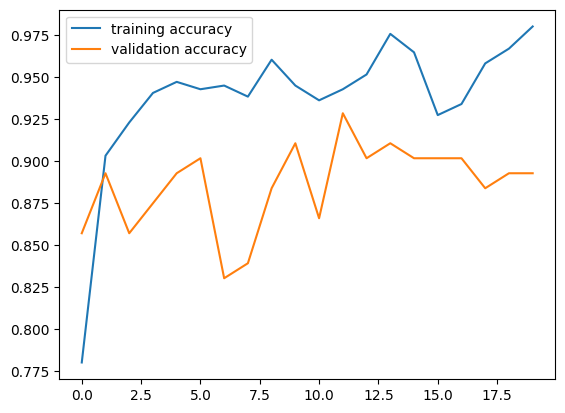

In [40]:
plt.plot(acc,label='training accuracy')
plt.plot(val_acc,label='validation accuracy')
plt.legend()
plt.show()

lets tune some param and see

Early Stopping: Stop training when validation loss stops improving to prevent overfitting.

In [41]:
transfer_model_1 = Sequential([
    base_model,GlobalAveragePooling2D(),
    Flatten(),
    Dense(150,activation='relu',kernel_regularizer=l2(0.02)),
    Dropout(0.4),
    Dense(1,activation='sigmoid')

])
transfer_model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [45]:
transfer_hist_1 = transfer_model_1.fit(train_data_gen,epochs=20,validation_data=validation_data_gen,callbacks=[lr_scheduler,early_stopping])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 879ms/step - accuracy: 0.7336 - loss: 5.5034 - val_accuracy: 0.8214 - val_loss: 4.4067 - learning_rate: 0.0010
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 372ms/step - accuracy: 0.8632 - loss: 4.0020 - val_accuracy: 0.8661 - val_loss: 3.2376 - learning_rate: 0.0010
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.9331 - loss: 2.9099 - val_accuracy: 0.8750 - val_loss: 2.4397 - learning_rate: 0.0010
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.9219 - loss: 2.2045 - val_accuracy: 0.8125 - val_loss: 2.0845 - learning_rate: 0.0010
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.9323 - loss: 1.7715 - val_accuracy: 0.8839 - val_loss: 1.6334 - learning_rate: 0.0010
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step - accuracy: 0.9502 - loss: 1.4053 - val_accuracy: 0.8661 - val_loss: 1.3085 - learning_rate: 0.0010
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.9234 - loss: 1.1774

In [47]:
predictions = transfer_model_1.predict(test_data_gen)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 9s/step


In [82]:
transfer_model_1.save('transfer_model_1.h5')

In [49]:
predictions[0]

array([0.37398928], dtype=float32)

In [50]:
pred = []

for x in predictions:
  if x>0.5:
    pred.append(1)
  else:
    pred.append(0)

In [51]:
pred

[0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [55]:
fin_loss , fin_acc = transfer_model_1.evaluate(test_data_gen)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.8656 - loss: 0.4804


In [56]:
fin_acc , fin_loss

(0.8714285492897034, 0.48168984055519104)

In [59]:
test_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [60]:
y_true=test_data_gen.classes

In [61]:
y_pred = pred

In [62]:
len(pred)

140

In [63]:
len(y_true)

140

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(confusion_matrix(y_true,y_pred))

[[28 42]
 [33 37]]


In [66]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.40      0.43        70
           1       0.47      0.53      0.50        70

    accuracy                           0.46       140
   macro avg       0.46      0.46      0.46       140
weighted avg       0.46      0.46      0.46       140



In [68]:
# Get a batch of images and labels from the test data generator
images, labels = next(test_data_gen)

# Predict labels for the images
predictions = transfer_model_1.predict(images)
predicted_labels = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


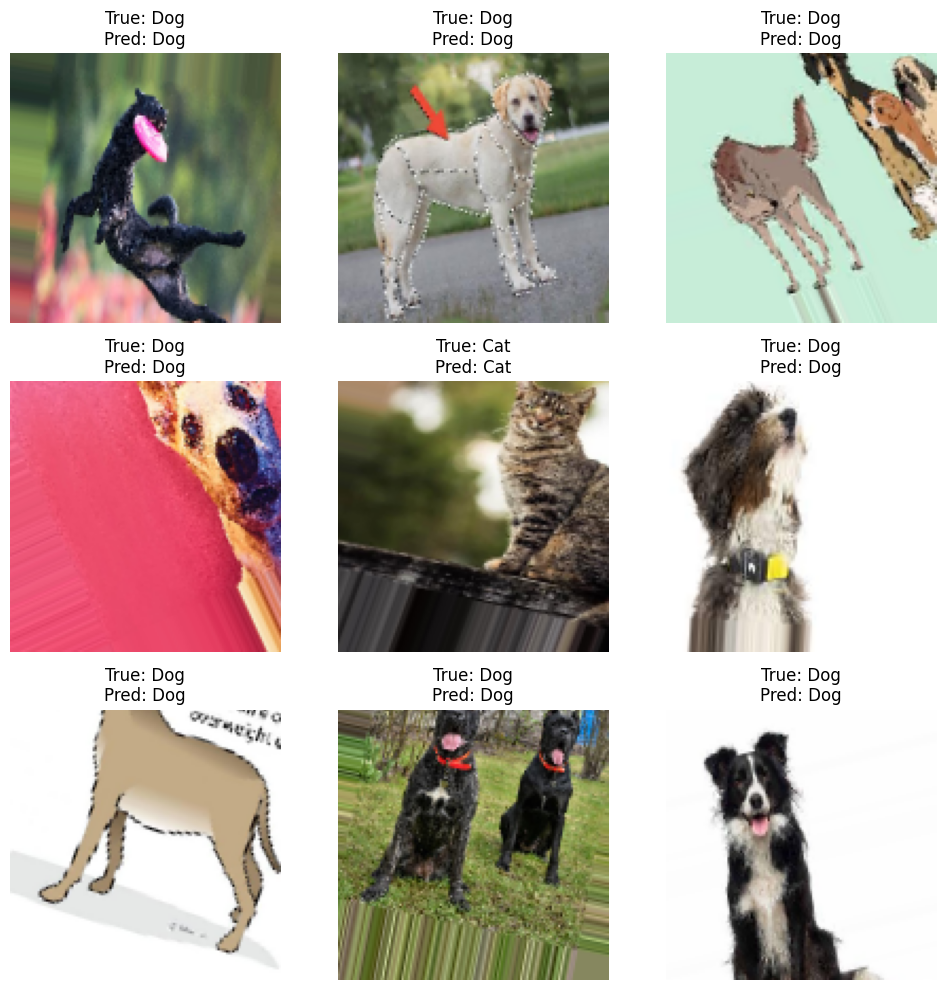

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the test data generator
images, labels = next(test_data_gen)

# If the images are normalized, rescale them back to the 0-255 range
images_rescaled = (images * 255).astype("uint8") if images.max() <= 1 else images

# Predict labels for the images
predictions = transfer_model_1.predict(images)
predicted_labels = []
for x in predictions:
  if x>0.5:
    predicted_labels.append(1)
  else:
    predicted_labels.append(0)



# Plot the first 9 images with their true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_rescaled[i])  # Display the correctly scaled images
    true_label = "Dog" if labels[i] == 1 else "Cat"
    predicted_label = "Dog" if predicted_labels[i] == 1 else "Cat"
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [77]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [81]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load your trained model
# model = load_model("path_to_your_model.h5")
model = transfer_model_1

# Preprocess the input image
def preprocess_image(image):
    image = image.resize((150, 150))  # Resize to the model's input size
    image = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define prediction function
def predict_image(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)[0][0]  # Get the probability of "Dog"
    label = "Dog" if prediction > 0.5 else "Cat"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    return f"{label} (Confidence: {confidence:.2f})"

# Create Gradio Interface
# Use gr.Image() instead of gr.inputs.Image()
interface = gr.Interface(
    fn=predict_image,  # Function to run predictions
    inputs=gr.Image(type='pil'),  # Input type is an image
    outputs="text",  # Output is text
    title="Cat vs. Dog Classifier",  # Title of the interface
    description="Upload an image to classify it as Cat or Dog."  # Description
)

# Launch the interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af39483a67a538b4e5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
